In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display


In [5]:
display.clear_output()

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/content


##**Installing Ultralytics**

In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 10.2 MB/s eta 0:00:00


In [9]:
import ultralytics

In [10]:
ultralytics.checks()

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


##**Importing the Chess Pieces Images Dataset from RoboFlow**

In [11]:
!mkdir {HOME}/datasets

In [12]:
%cd {HOME}/datasets

/content/datasets


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("roboflow-100").project("chess-pieces-mjzgj")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chess-pieces-1 in yolov5pytorch:: 100%|██████████| 590/590 [00:00<00:00, 7990.13it/s]


##**Train the YOLOv8 Model on the Custom dataset**

In [14]:
%cd {HOME}

/content


In [15]:
%cd {dataset.location}

/content/datasets/chess-pieces-1


In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/chess-pieces-1/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/chess-pieces-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

In [18]:
!ls {HOME}//runs/detect/train2

args.yaml					    PR_curve.png	train_batch781.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch782.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1699008009.83bd4fca1f92.1234.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch780.jpg


##**Displaying the confusion metrics**

/content


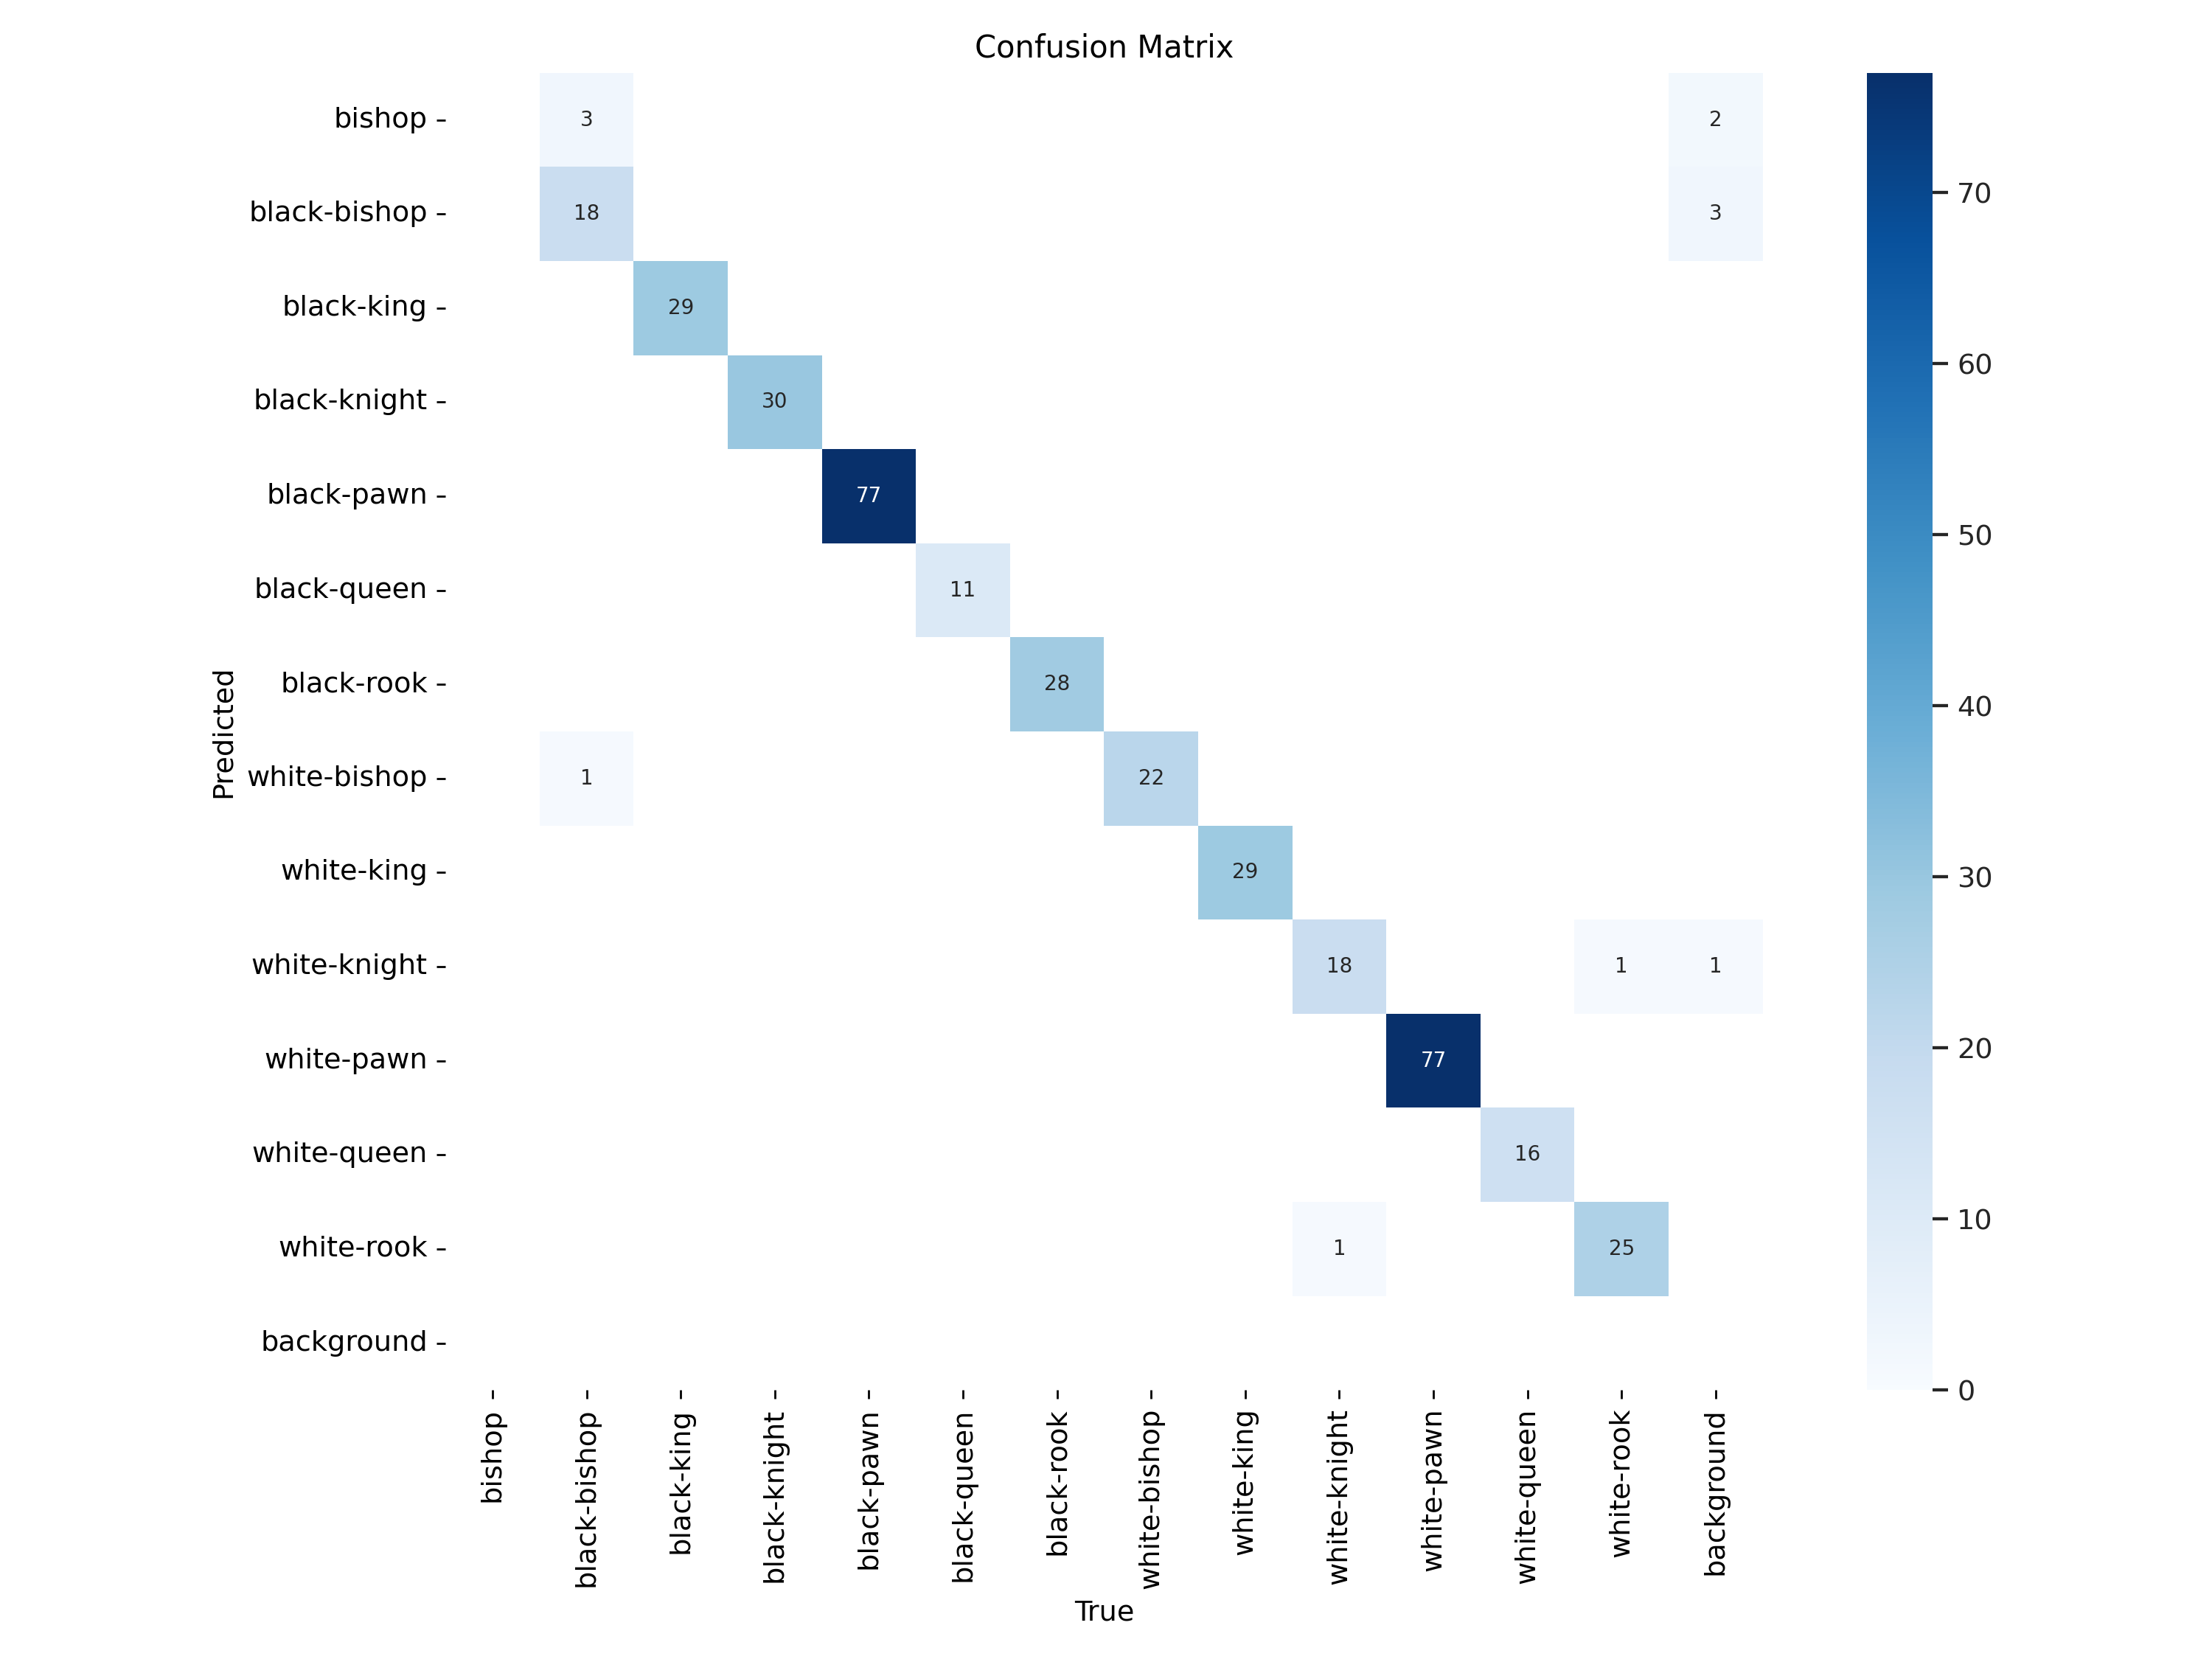

In [21]:
%cd {HOME}
Image(filename = f'{HOME}//runs/detect/train2/confusion_matrix.png', width = 900)

##**Training and validation loss**

/content


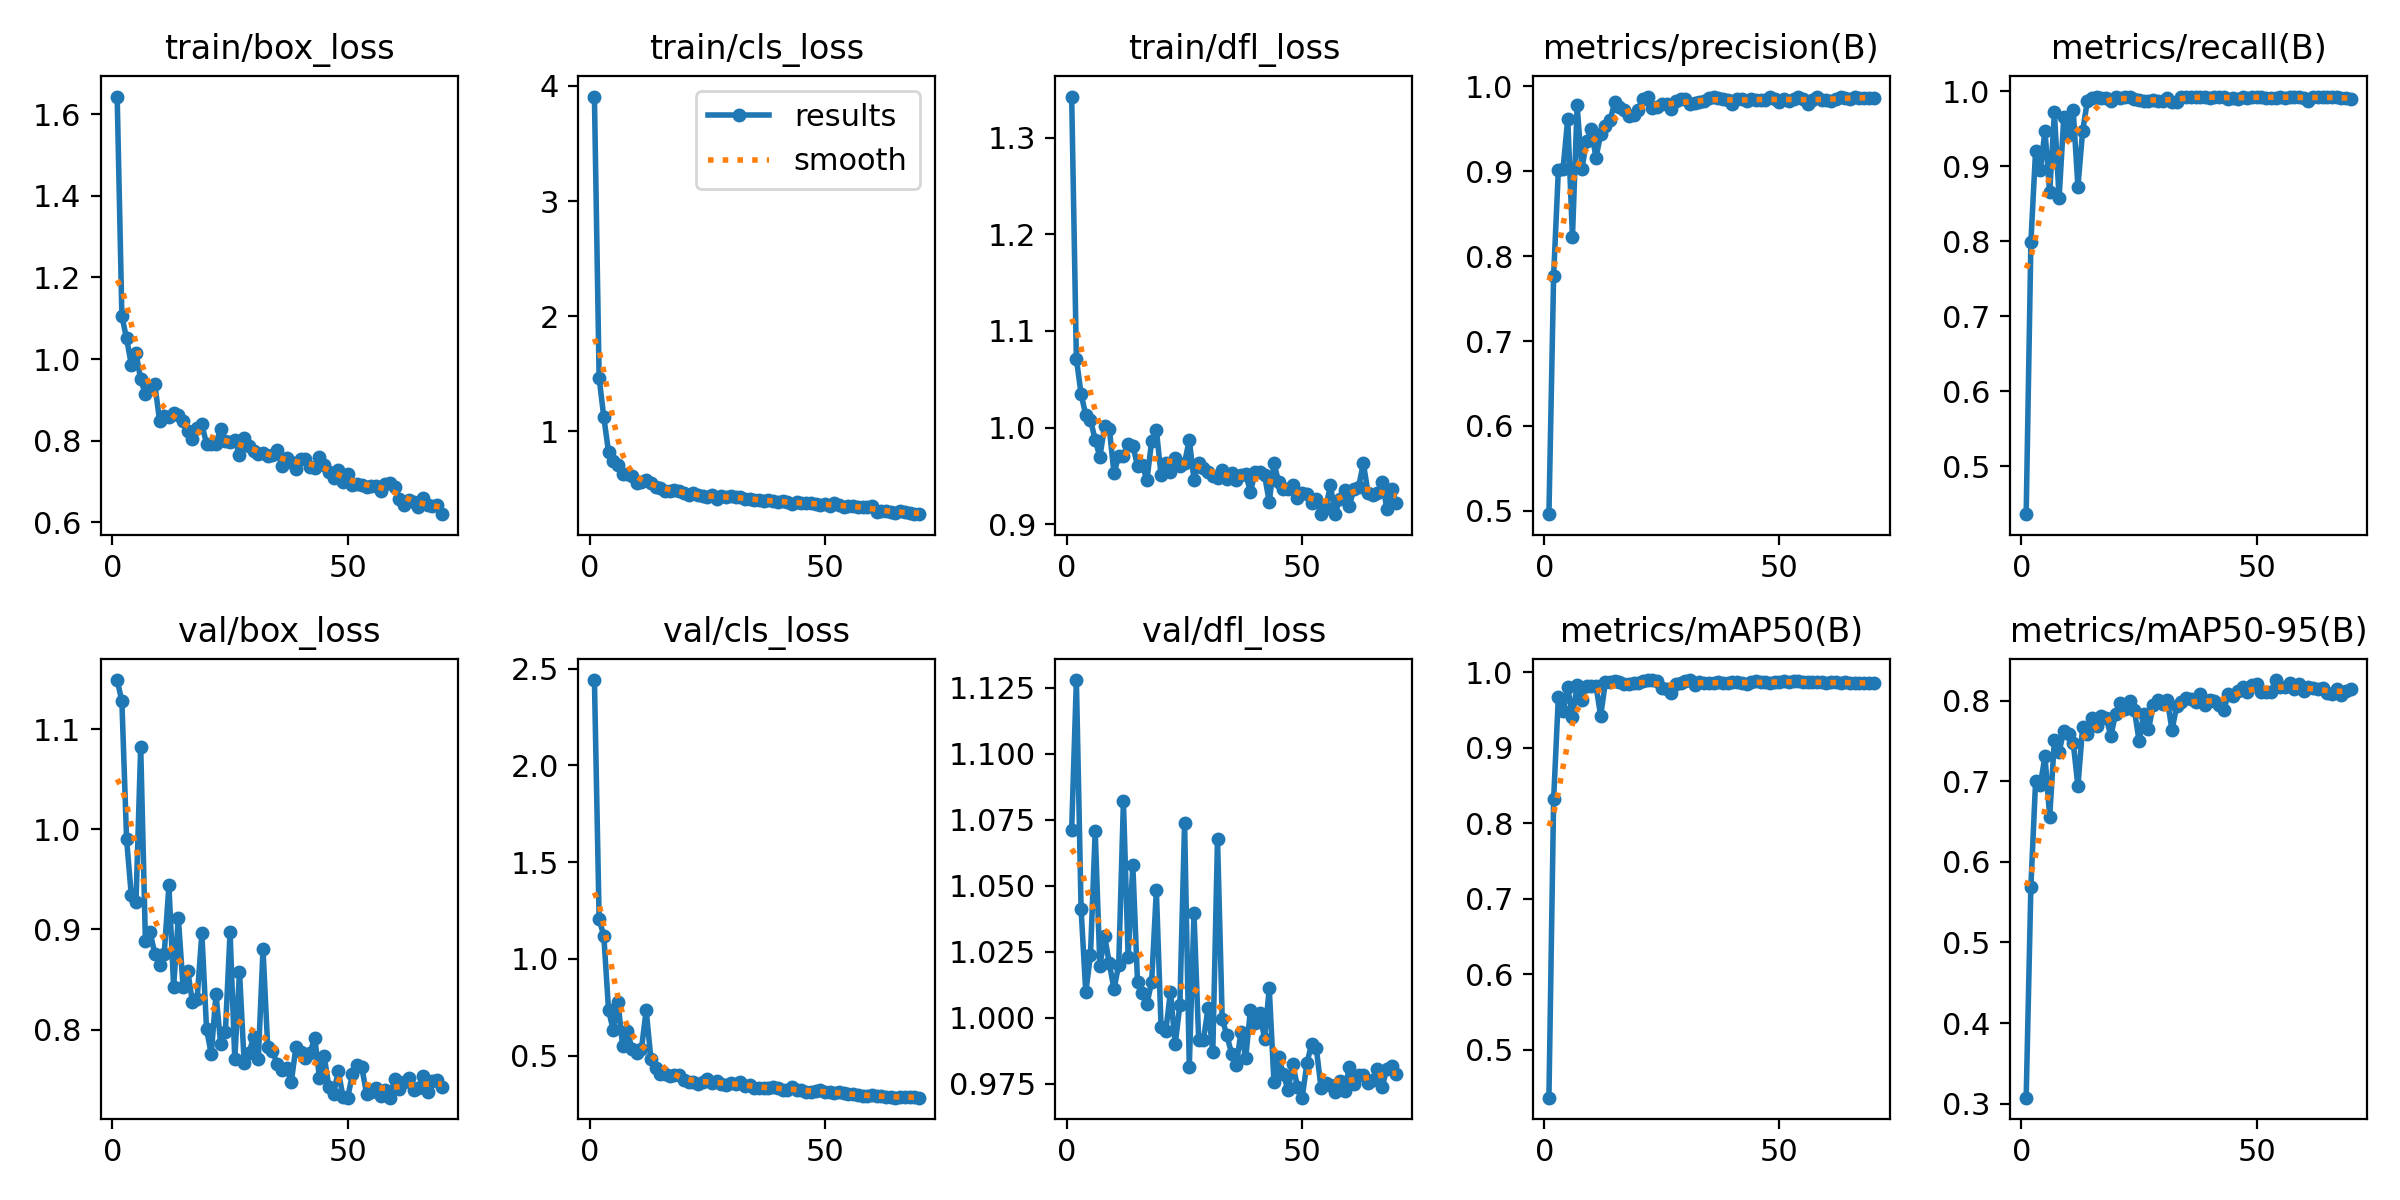

In [22]:
%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train2/results.png', width = 600)

/content


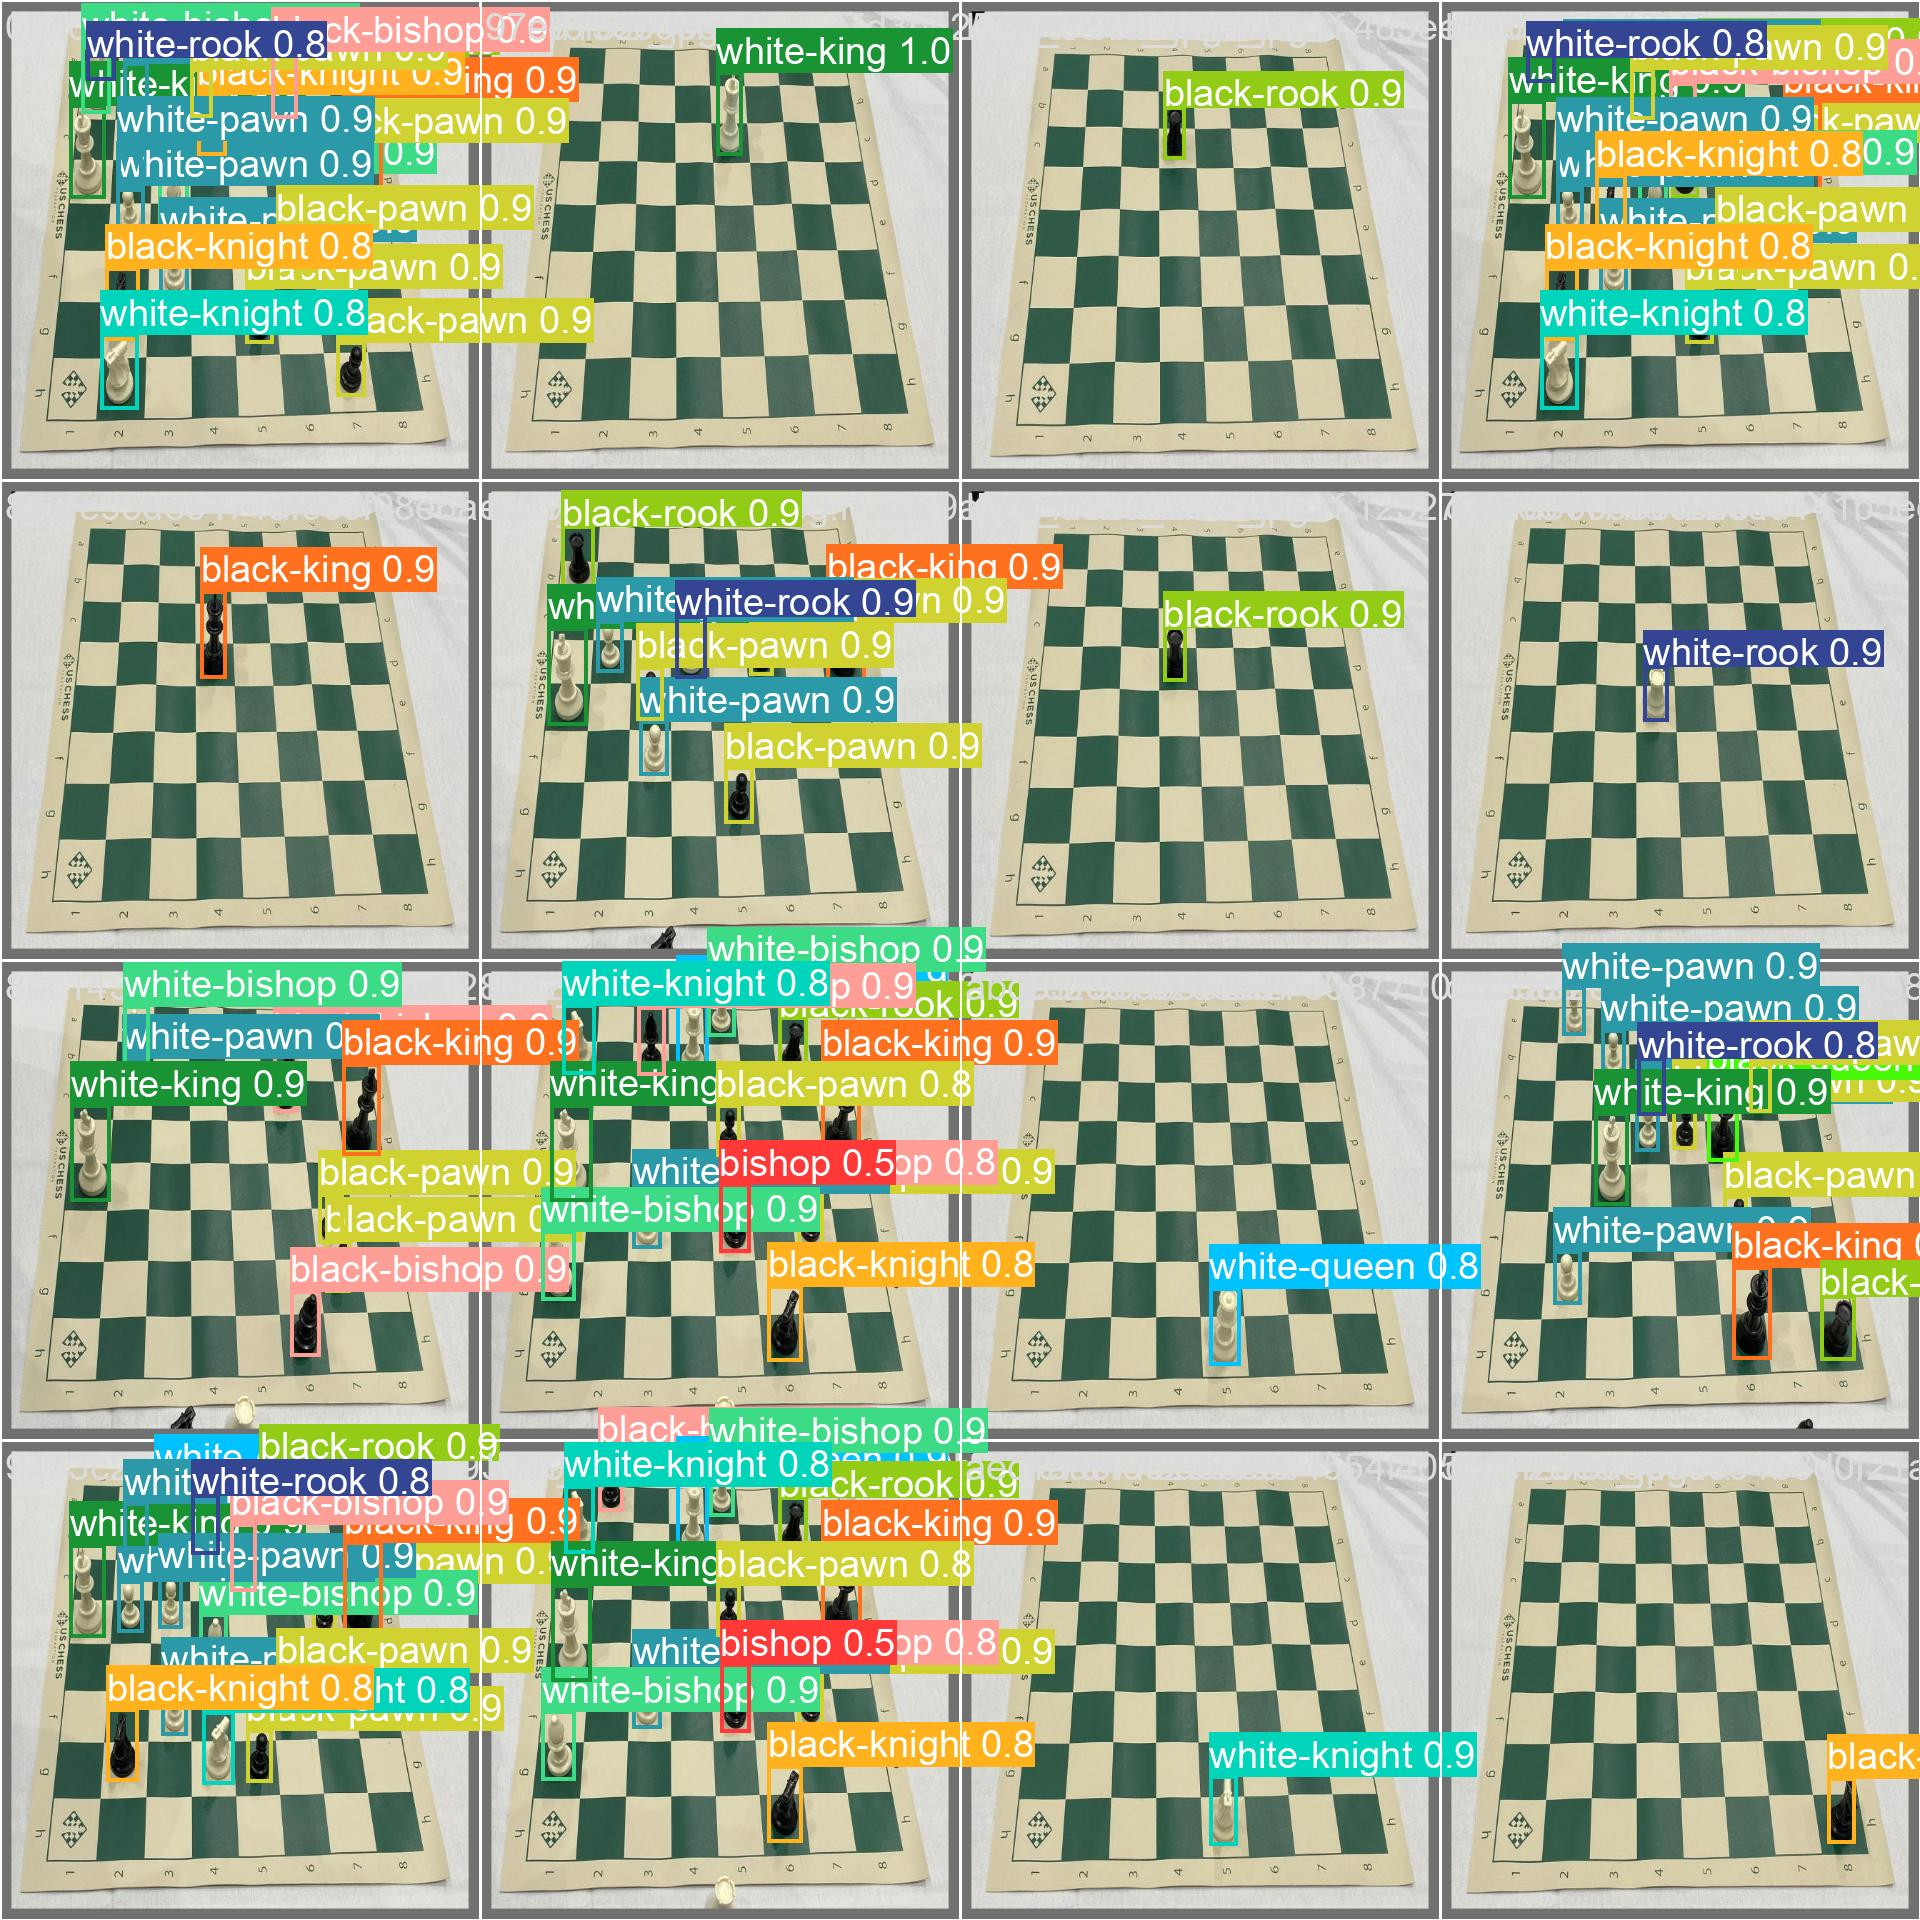

In [23]:
%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width = 600)

##**Validate custom model**

In [24]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/chess-pieces-1/data.yaml

/content
Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/chess-pieces-1/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.57s/it]
                   all         58        386      0.988      0.991      0.989      0.824
          black-bishop         58         22      0.999      0.955       0.96      0.696
            black-king         58         29      0.997          1      0.995      0.843
          black-knight         58         30      0.995          1      0.995      0.847
            black-pawn         58         77      0.998          1      0.995      0.819
           black-queen         58         11      0.992          1      0.995      0.818
            black-rook        

##**Inference with custom model**

In [28]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/chess-pieces-1/valid/images

/content
Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients, 78.7 GFLOPs

image 1/58 /content/datasets/chess-pieces-1/valid/images/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.c8a96ecab0d72fb25f296883f537e341.jpg: 640x640 1 black-bishop, 1 black-king, 2 black-knights, 5 black-pawns, 2 black-rooks, 2 white-bishops, 1 white-king, 1 white-knight, 4 white-pawns, 1 white-queen, 1 white-rook, 37.0ms
image 2/58 /content/datasets/chess-pieces-1/valid/images/0b2252c93c53e1b2e61d485b22328e2e_jpg.rf.78adaf76867c4486c1b4dd06ba06db62.jpg: 640x640 1 white-rook, 37.1ms
image 3/58 /content/datasets/chess-pieces-1/valid/images/0c09b79cff39932c59ecc745dd827906_jpg.rf.681233402144e4379f556ca71789ad92.jpg: 640x640 1 black-king, 1 black-pawn, 1 black-queen, 2 black-rooks, 1 white-bishop, 1 white-king, 3 white-pawns, 37.0ms
image 4/58 /content/datasets/chess-pieces-1/valid/images/0d9afc3d23392c3958f53d7fe71fd

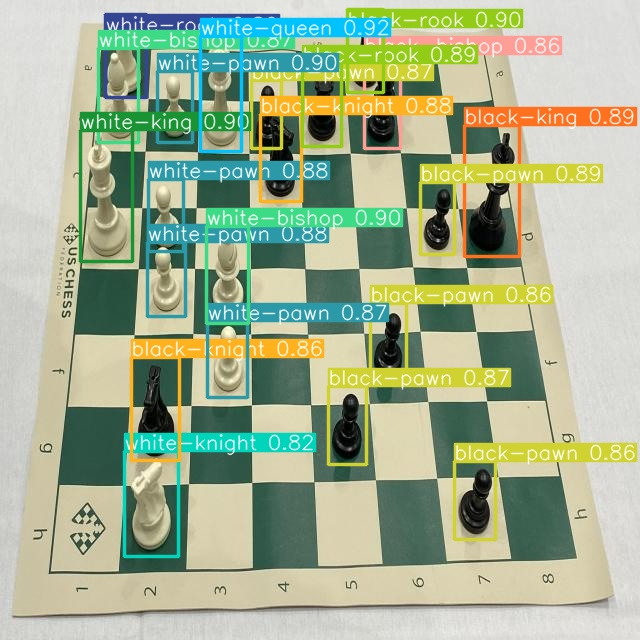

In [31]:
Image('/content/runs/detect/predict2/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.c8a96ecab0d72fb25f296883f537e341.jpg')

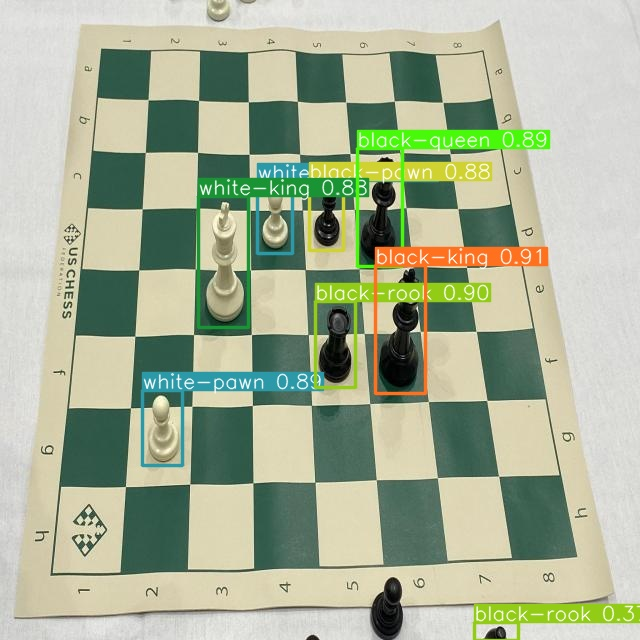

In [35]:
Image('/content/runs/detect/predict2/3e0c67f38992fe16dfc163f7f5336263_jpg.rf.98d4f3e8f48534a3962e4fac848f32bb.jpg')

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/chess.mp4'

/content
Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/2904) /content/chess.mp4: 384x640 1 white-pawn, 206.3ms
video 1/1 (2/2904) /content/chess.mp4: 384x640 1 white-pawn, 25.8ms
video 1/1 (3/2904) /content/chess.mp4: 384x640 1 white-pawn, 25.9ms
video 1/1 (4/2904) /content/chess.mp4: 384x640 1 white-pawn, 25.8ms
video 1/1 (5/2904) /content/chess.mp4: 384x640 1 black-rook, 1 white-pawn, 25.8ms
video 1/1 (6/2904) /content/chess.mp4: 384x640 1 black-rook, 1 white-pawn, 22.4ms
video 1/1 (7/2904) /content/chess.mp4: 384x640 1 white-pawn, 22.3ms
video 1/1 (8/2904) /content/chess.mp4: 384x640 1 black-knight, 1 black-rook, 1 white-pawn, 22.3ms
video 1/1 (9/2904) /content/chess.mp4: 384x640 1 black-knight, 1 black-rook, 1 white-pawn, 22.3ms
video 1/1 (10/2904) /content/chess.mp4: 384x640 2 black-rooks, 1 white-pawn, 20.5ms
video 1/1 (11/2904) /content/chess.m

##**Display the video**

In [46]:
!rm '/content/result_compressed.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/chess.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)